# Dartbrains Tutorial


## Part 1: Download the data  

#### We're going to download the data from OSF into a specified directory


In [ ]:
project_id = 'vhtf6'
output_directory = 'F://OSF//Dartbrains//Data'

!osf -p {project_id} clone {output_directory}

#### Next, let's see the BID format of our data.

#### The output will tell us how many subjects there are (94) and that they all only did one functional run

In [2]:
from bids import BIDSLayout

data_dir = 'F://OSF//Dartbrains//data//osfstorage-archive//localizer'

layout = BIDSLayout(data_dir, derivatives=False)
layout

C:\Users\joann\Downloads\Anaconda\lib\site-packages\bids\layout\models.py:102: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  FutureWarning)


BIDS Layout: ...a\osfstorage-archive\localizer | Subjects: 94 | Sessions: 0 | Runs: 0

#### Let's get the names of all of the functional data files, and then look at the first 10 files

In [4]:
file_list = layout.get(target='subject', suffix='bold', return_type='file', extension='nii.gz')
file_list[:10]

['F:\\OSF\\Dartbrains\\data\\osfstorage-archive\\localizer\\sub-S01\\func\\sub-S01_task-localizer_bold.nii.gz',
 'F:\\OSF\\Dartbrains\\data\\osfstorage-archive\\localizer\\sub-S02\\func\\sub-S02_task-localizer_bold.nii.gz',
 'F:\\OSF\\Dartbrains\\data\\osfstorage-archive\\localizer\\sub-S03\\func\\sub-S03_task-localizer_bold.nii.gz',
 'F:\\OSF\\Dartbrains\\data\\osfstorage-archive\\localizer\\sub-S04\\func\\sub-S04_task-localizer_bold.nii.gz',
 'F:\\OSF\\Dartbrains\\data\\osfstorage-archive\\localizer\\sub-S05\\func\\sub-S05_task-localizer_bold.nii.gz',
 'F:\\OSF\\Dartbrains\\data\\osfstorage-archive\\localizer\\sub-S06\\func\\sub-S06_task-localizer_bold.nii.gz',
 'F:\\OSF\\Dartbrains\\data\\osfstorage-archive\\localizer\\sub-S07\\func\\sub-S07_task-localizer_bold.nii.gz',
 'F:\\OSF\\Dartbrains\\data\\osfstorage-archive\\localizer\\sub-S08\\func\\sub-S08_task-localizer_bold.nii.gz',
 'F:\\OSF\\Dartbrains\\data\\osfstorage-archive\\localizer\\sub-S09\\func\\sub-S09_task-localizer_bold.n

### Now let's try to visualize some of this data

#### Let's use nibabel to inspect the shape of the first file 

In [5]:
import nibabel as nib

dat = nib.load(file_list[0])
dat.shape

(64, 64, 40, 1, 128)

#### We can see that there are 64 x 64 x 40 voxels, and 128 volumes, but there is an extra dimension (1) that we need to get rid of

In [6]:
dat.get_data().squeeze().shape

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


(64, 64, 40, 128)

#### 'squeeze' gets rid of that extra dimension. Now we need to create a new nifti image with the correct data and write it back out to a file that we can use later.

#### We will initialize a new nibabel nifti instance and write it out to file.

In [7]:
dat_fixed = nib.Nifti1Image(dat.get_data().squeeze(), dat.affine)
nib.save(dat_fixed, file_list[0])

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


In [8]:
nib.load(file_list[0]).shape

(64, 64, 40, 128)

### It worked!

#### Now let's use a loop to do that for the rest of our files:

In [10]:
file_list = layout.get(target='subject', suffix='bold', return_type='file', extension='nii.gz')

for f in file_list:
    dat = nib.load(f)
    if len(dat.shape) > 4:
        dat_fixed = nib.Nifti1Image(dat.get_data().squeeze(), dat.affine)
        nib.save(dat_fixed, f)

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior goi

In [17]:
from nltools.data import Brain_Data
data =Brain_Data(file_list[0])
data

nltools.data.brain_data.Brain_Data(data=(128, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])



# Part 2: Introduction to Neuroimaging Data in Python


## Let's first load an anatomical image


In [33]:
import os
data_dir = "F://OSF//Dartbrains//data//osfstorage-archive//localizer//sub-S01//anat//"
os.chdir(data_dir)
data = nib.load('sub-S01_T1w.nii.gz')



### We can use a variety of functions to explore our file

In [34]:
data.get_data()

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


array([[[115., 308., 195., ..., 253., 105., 533.],
        [177., 161., 405., ...,  96., 396., 617.],
        [358., 287., 693., ..., 107., 179., 767.],
        ...,
        [ 89., 213., 269., ..., 260., 383., 702.],
        [196., 202., 323., ..., 293., 343., 282.],
        [305., 574., 179., ..., 360., 247., 177.]],

       [[181., 196., 364., ..., 247., 275., 351.],
        [341., 384., 374., ..., 411., 429.,  88.],
        [336.,  89., 303., ..., 573., 242., 206.],
        ...,
        [305., 302., 237., ..., 238., 444., 289.],
        [ 84., 181., 218., ..., 620., 531., 259.],
        [180.,  74., 500., ..., 318., 156., 494.]],

       [[453., 266., 210., ..., 141., 348., 332.],
        [ 94., 734., 122., ..., 232., 558., 358.],
        [463., 540., 399., ...,  74., 438., 172.],
        ...,
        [119., 194., 166., ..., 131., 303., 259.],
        [395., 236., 418., ..., 185., 619., 153.],
        [335., 251., 133., ...,  96., 536., 285.]],

       ...,

       [[540., 470., 227

#### That printed out all of our data within the file, let's see the shape of our file:

In [35]:
data.shape

(192, 256, 128)

#### Finally, let's get general information about the file:

In [36]:
data?

### We can also visualize our data:

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


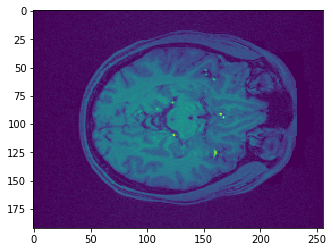

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data.get_data()[:,:,50])

### That's one slice of the anatomical image, let's take another!

#### We can use any z-coordinate within our range (0-128)

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


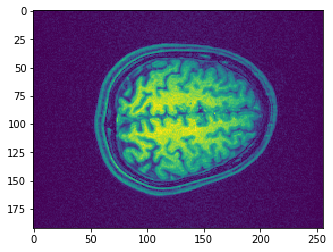

In [47]:
plt.imshow(data.get_data()[:,:,95])


#### We can also access data from the image header:


In [48]:
header = data.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 192 256 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.   1.   1.   1.2  0.   1.   1.   1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Mar  1 2013'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 96.0
qoffset_y       : -128.0
qoffset_z       : -76.8
srow_x    

#### Some of the important information in the header is information about the orientation of the image in space. This can be represented as the affine matrix.

### We need to transform the coordinates of our image, which are in voxel space (i,j,k) into standard (x,y,z) space

#### We can do this by performing an affine transformation

Because we know that the scanner collects images on a grid, we can use linear (affine) transformations to convert coordinates.

The voxel coordinate tells us almost nothing about where the data came from in terms of position in the scanner. For example, let’s say we have the voxel coordinate (26, 30, 16). Without more information we have no idea whether this voxel position is on the left or right of the brain, or came from the left or right of the scanner.

This is because the scanner allows us to collect voxel data in almost any arbitrary position and orientation within the magnet.


Affine transformations preserve ratios between coordinates. Getting our voxel space coordinates into standard space allows us to have millimeter positions of the voxels.

In [49]:
data.affine

array([[  -1.        ,    0.        ,    0.        ,   96.        ],
       [   0.        ,    1.        ,    0.        , -128.        ],
       [   0.        ,    0.        ,    1.20000005,  -76.80000305],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

#### Let's perform more transformations: reflect (make it face the opposite way)

In [50]:
import numpy as np
from nibabel.affines import apply_affine, from_matvec, to_matvec

reflect = np.array([[-1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]])

reflect_affine = from_matvec(reflect)
reflect_affine

array([[-1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  1]])

#### Shift the image 10 units in the x direction 

In [51]:
translate_affine = from_matvec(reflect, [10, 0, 0])
translate_affine

array([[-1,  0,  0, 10],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  1]])

## Using NiLearn to Plot

In [52]:
%matplotlib inline

from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi

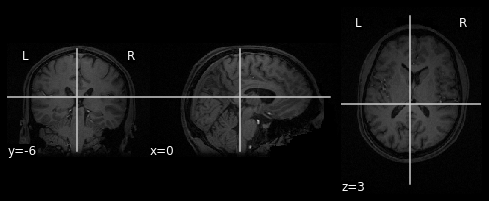

In [53]:
plot_anat(data)

#### Here we can see the anatomical images at various z coordinates:

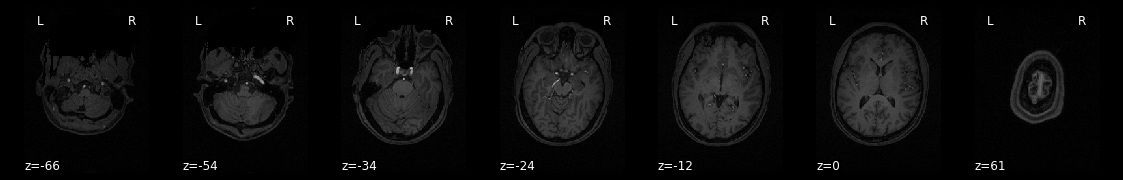

In [54]:
plot_anat(data, draw_cross=False, display_mode='z')

In [55]:
plot_anat?


#### We can also use an interactive viewer:



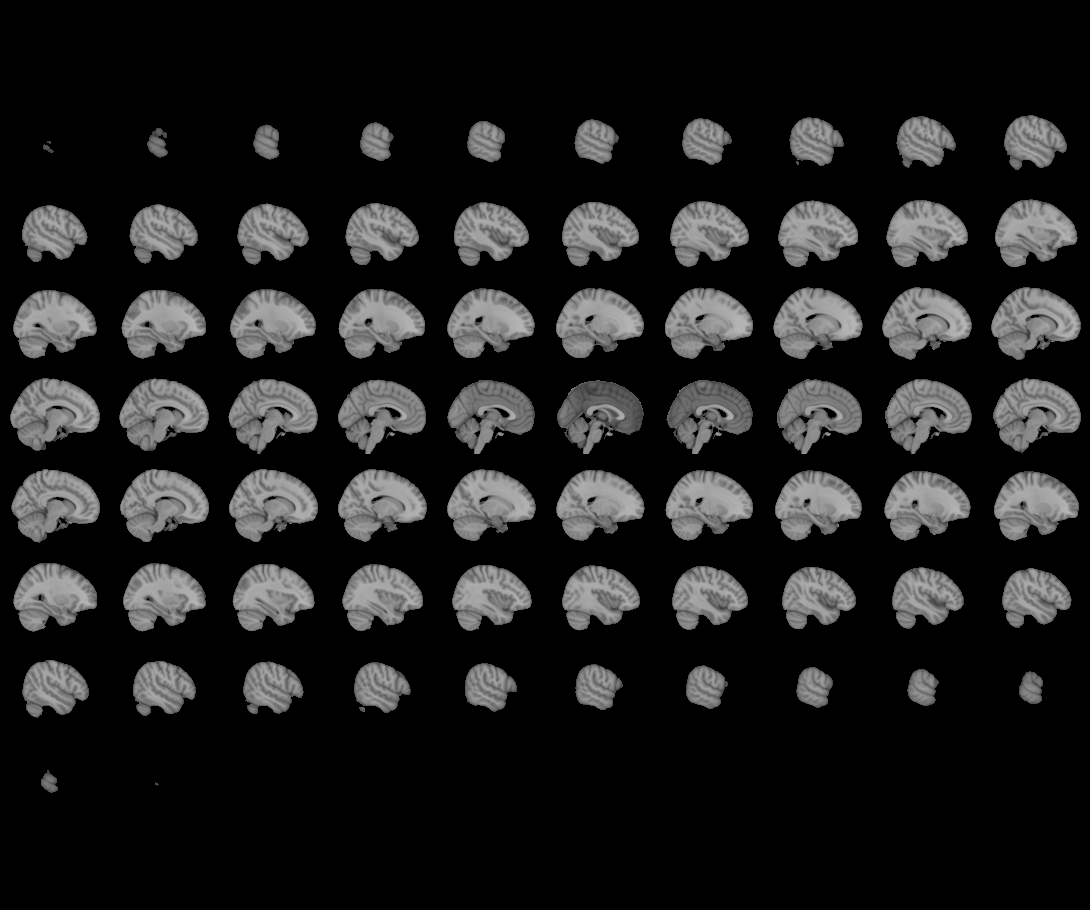
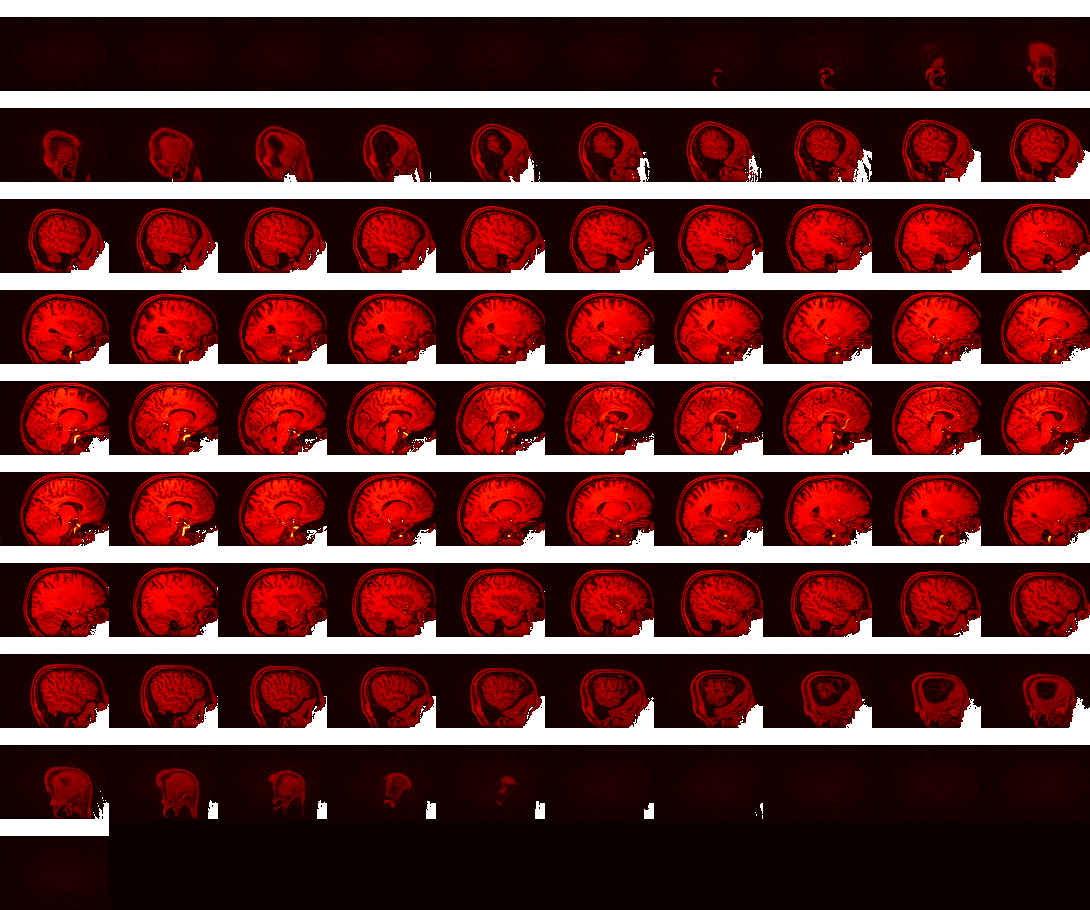

In [56]:
view_img(data)

#### We can also load 4d data!

In [58]:
data_dir_func = "F://OSF//Dartbrains//data//osfstorage-archive//localizer//sub-S01//func"
os.chdir(data_dir_func)
func = nib.load('sub-S01_task-localizer_bold.nii.gz')
print(func.shape)

(64, 64, 40, 128)


#### Now, let's plot the average voxel signal intensity across the whole brain for each of the 128 TRs.

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


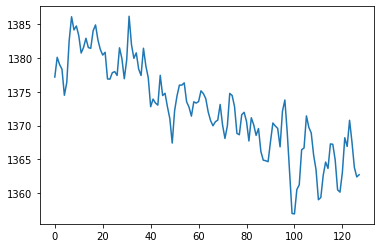

In [60]:
func_data = func.get_data()
plt.plot(np.mean(func_data,axis=(0,1,2)))

# Part 3 : Introduction to Neural Signal Processing 

## Hemodynamic response function and the time-domain
First we will work on signals in the time domain. This requires measuring a signal at a constant interval over time. The frequency with which we measure a signal is referred to as the sampling frequency. The units of this are typically described in  Hz  - or the number of cycles per second. It is critical that the sampling frequency is consistent over the entire measurement of the time series.



### Neural and Hemodynamic models

In functional MRI (FMRI), we often have the subjects do a task in the scanner. For example, we might have the subject lying looking at a fixation cross on the screen for most of the time, and sometimes show a very brief burst of visual stimulation, such as a flashing checkerboard.

We will call each burst of stimulation an event.

The FMRI signal comes about first through changes in neuronal firing, and then by blood flow responses to the changes in neuronal firing. In order to predict the FMRI signal to an event, we first need a prediction (model) of the changes in neuronal firing, and second we need a prediction (model) of how the blood flow will change in response to the neuronal firing.

So we have a two-stage problem:

1) predict the neuronal firing to the event (make a neuronal firing model)

2) predict the blood flow changes caused by the neuronal firing (a hemodynamic model).

Convolution is a simple way to create a hemodynamic model from a neuronal firing model.
Adapted from https://practical-neuroimaging.github.io/on_convolution.html

### The neuronal firing model

The neuronal firing model is our prediction of the profile of neural activity in response to the event.

For example, in this case, with a single stimulation, we might predict that, as soon as the visual stimulation went on, the cells in the visual cortex instantly increased their firing, and kept firing at the same rate while the stimulation was on.

In that case, our neural model of an event starting at 4 seconds, lasting 5 seconds, might look like this:

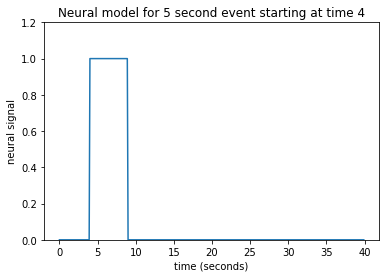

In [3]:
import numpy as np
import matplotlib.pyplot as plt

times = np.arange(0, 40, 0.1)
n_time_points = len(times)
neural_signal = np.zeros(n_time_points)
neural_signal[(times >= 4) & (times < 9)] = 1
plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 1.2)
plt.title("Neural model for 5 second event starting at time 4")
plt.plot(times, neural_signal)



This type of simple off - on - off model is a boxcar function.

Of course we could have had another neural model, with the activity gradually increasing, or starting high and then dropping, but let us stick to this simple model for now.

Now we need to predict our hemodynamic signal, given our prediction of neuronal firing.

#### The impulse response

Let’s simplify a little by specifying that the event was really short. Call this event – an impulse. This simplifies our neural model to a single spike in time instead of the sustained rise of the box-car function.

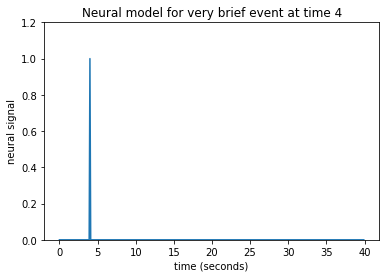

In [4]:
neural_signal = np.zeros(n_time_points)
i_time_4 = np.where(times == 4)[0]  # index of value 4 in "times"
neural_signal[i_time_4] = 1  # A single spike at time == 4

plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 1.2)
plt.title("Neural model for very brief event at time 4")
plt.plot(times, neural_signal)

Let us now imagine that I know what the hemodynamic response will be to such an impulse. I might have got this estimate from taking the FMRI signal following very brief events, and averaging over many events. Here is one such estimate of the hemodynamic response to a very brief stimulus:



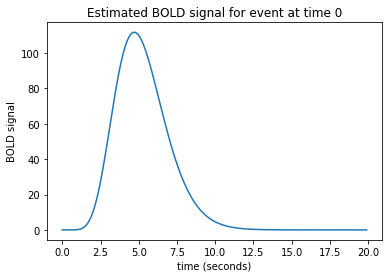

In [5]:
def hrf(t):
    "A hemodynamic response function"
    return t ** 8.6 * np.exp(-t / 0.547)

hrf_times = np.arange(0, 20, 0.1) #range from 0 to 20. smallest increment of 0.1
hrf_signal = hrf(hrf_times)

plt.xlabel('time (seconds)')
plt.ylabel('BOLD signal')
plt.title('Estimated BOLD signal for event at time 0')
plt.plot(hrf_times, hrf_signal)

This is the hemodynamic response to a neural impulse. In signal processing terms this is the hemodynamic impulse response function. It is usually called the hemodynamic response function (HRF), because it is a function that gives the predicted hemodynamic response at any given time following an impulse at time 0.

### Building a hemodynamic output from neuronal input
We now have an easy way to predict the hemodynamic output from our single impulse at time 4. We take the HRF (prediction for an impulse starting at time 0), and shift it by 4 seconds-worth to give our predicted output:

Text(0.5, 1.0, 'Neural model for amplitude 2 impulse')

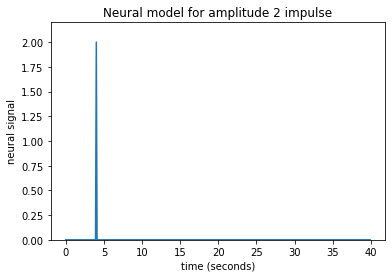

In [8]:
neural_signal[i_time_4] = 2  # An impulse with amplitude 2
plt.plot(times, neural_signal)
plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 2.2)
plt.title('Neural model for amplitude 2 impulse')

Maybe I can make the assumption that, if the impulse is twice as large then the response will be twice as large. This is the assumption that the response scales linearly with the impulse.

Now I can predict the output for an impulse of amplitude 2 by taking my HRF, shifting by 4, as before, and then multiplying the HRF by 2.

What if I have several impulses? For example, imagine I had an impulse amplitude 2 at time == 4, then another of amplitude 1 at time == 10, and another of amplitude 3 at time == 20.


Text(0.5, 1.0, 'Neural model for three impulses')

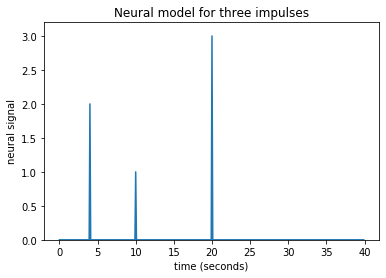

In [10]:
neural_signal[i_time_4] = 2  # An impulse with amplitude 2
i_time_10 = np.where(times == 10)[0]  # index of value 10 in "times"
neural_signal[i_time_10] = 1  # An impulse with amplitude 1
i_time_20 = np.where(times == 20)[0]  # index of value 20 in "times"
neural_signal[i_time_20] = 3  # An impulse with amplitude 3
plt.plot(times, neural_signal)
plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 3.2)
plt.title('Neural model for three impulses')

### Working out an algorithm

Now we have a general algorithm for making our output hemodynamic signal from our input neural signal:

Start with an output vector that is a vector of zeros;

For each index i in the input vector (the neural signal):

Prepare a shifted copy of the HRF vector, starting at i. Call this the shifted HRF vector;
Multiply the shifted HRF vector by the value in the input at index i, to give the shifted, scaled HRF vector;
Add the shifted scaled HRF vector to the output.
There is a little problem with our algorithm – the length of the output vector.

Imagine that our input (neural) vector is N time points long. Say the original HRF vector is M time points long.

In our algorithm, when the iteration gets to the last index of the input vector (i=N−1), the shifted scaled HRF vector will, as ever, be M points long. If the output vector is the same length as the input vector, we can add only the first point of the new scaled HRF vector to the last point of the output vector, but all the subsequent values of the scaled HRF vector extend off the end of the output vector and have no corresponding index in the output. The way to solve this is to extend the output vector by the necessary M-1 points. Now we can do our algorithm in code.

Text(0.5, 1.0, 'Output BOLD signal using our algorithm')

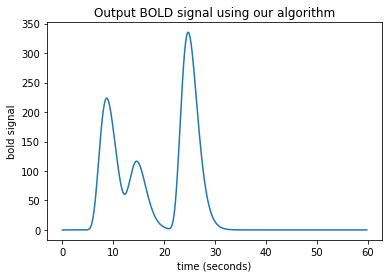

In [11]:
N = n_time_points
M = n_hrf_points
bold_signal = np.zeros(N + M - 1)  # adding the tail
for i in range(N):
    input_value = neural_signal[i]
    # Adding the shifted, scaled HRF
    bold_signal[i : i + n_hrf_points] += hrf_signal * input_value
# We have to extend 'times' to deal with more points in 'bold_signal'
extra_times = np.arange(n_hrf_points - 1) * 0.1 + 40
times_and_tail = np.concatenate((times, extra_times))
plt.plot(times_and_tail, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Output BOLD signal using our algorithm')

### This is convolution
Here’s the same thing using the numpy convolve function:

Text(0.5, 1.0, 'Our algorithm is the same as convolution')

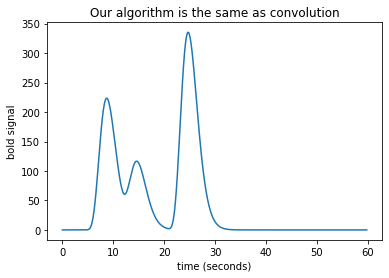

In [12]:
bold_signal = np.convolve(neural_signal, hrf_signal)
plt.plot(times_and_tail, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Our algorithm is the same as convolution')

### Convolution with matrices

For what follows, it is a bit easier to see what is going on with a lower time resolution – say one time point per second. This time we’ll make the first event last 3 seconds:

Text(0.5, 1.0, 'Predicted BOLD signal from convolution, 1 second resolution')

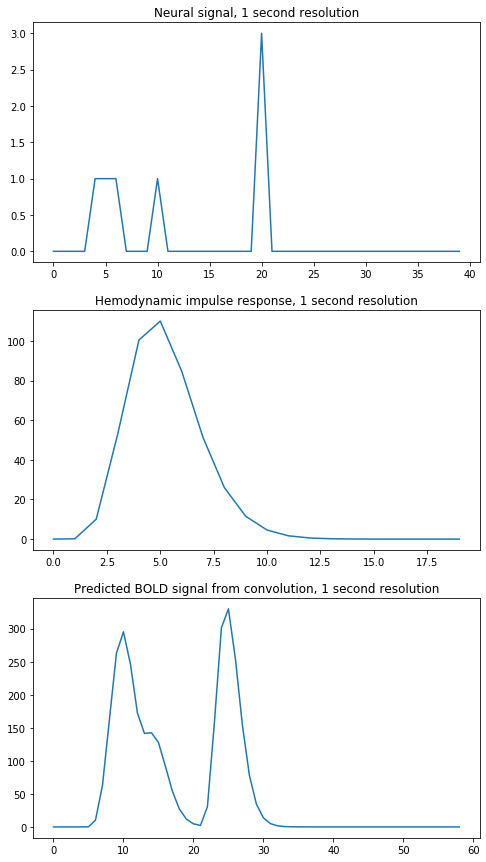

In [13]:
times = np.arange(0, 40)  # One time point per second
n_time_points = len(times)
neural_signal = np.zeros(n_time_points)
neural_signal[4:7] = 1  # A 3 second event
neural_signal[10] = 1
neural_signal[20] = 3
hrf_times = np.arange(20)
hrf_signal = hrf(hrf_times)  # The HRF at one second time resolution
n_hrf_points = len(hrf_signal)
bold_signal = np.convolve(neural_signal, hrf_signal)
times_and_tail = np.arange(n_time_points + n_hrf_points - 1)
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
axes[0].plot(times, neural_signal)
axes[0].set_title('Neural signal, 1 second resolution')
axes[1].plot(hrf_times, hrf_signal)
axes[1].set_title('Hemodynamic impulse response, 1 second resolution')
axes[2].plot(times_and_tail, bold_signal)
axes[2].set_title('Predicted BOLD signal from convolution, 1 second resolution')

Our algorithm, which turned out to give convolution, had us add a shifted, scaled version of the HRF to the output, for every index. This is step 5 of our algorithm.

Now let us go back to our convolution algorithm. Imagine that, instead of adding the shifted scaled HRF to the output vector, we store each shifted scaled HRF as a row in an array, that has one row for each index in the input vector. Then we can get the same output vector as before by taking the sum across the columns of this array:

In [14]:
N = n_time_points
M = n_hrf_points
shifted_scaled_hrfs = np.zeros((N, N + M - 1))
for i in range(N):
    input_value = neural_signal[i]
    # Storing the shifted, scaled HRF
    shifted_scaled_hrfs[i, i : i + n_hrf_points] = hrf_signal * input_value
bold_signal_again = np.sum(shifted_scaled_hrfs, axis=0)

# We check that the result is almost exactly the same
# (allowing for tiny differences due to the order of +, * operations)
import numpy.testing as npt
npt.assert_almost_equal(bold_signal, bold_signal_again)

We can also do exactly the same operation by first making an array with the shifted HRFs, without scaling, and then multiplying each row by the corresponding input value, before doing the sum. Here we are doing the shifting first, and then the scaling, and then the sum. It all adds up to the same operation:

In [15]:
shifted_hrfs = np.zeros((N, N + M - 1))
for i in range(N):
    # Storing the shifted HRF without scaling
    shifted_hrfs[i, i : i + n_hrf_points] = hrf_signal
# Then do the scaling
shifted_scaled_hrfs = np.zeros((N, N + M - 1))
for i in range(N):
    input_value = neural_signal[i]
    # Scaling the stored HRF by the input value
    shifted_scaled_hrfs[i, :] = shifted_hrfs[i, :] * input_value
# Then the sum
bold_signal_again = np.sum(shifted_scaled_hrfs, axis=0)
# This gives the same result, once again
npt.assert_almost_equal(bold_signal, bold_signal_again)

#### This is what the shifted HRFs look like as an image:

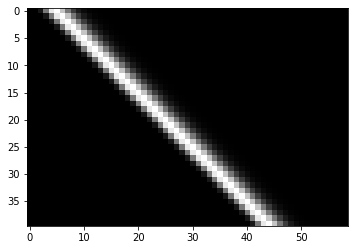

In [16]:
plt.imshow(shifted_hrfs, cmap='gray', interpolation='nearest')

#### Each new row of shifted_hrfs corresponds to the HRF, shifted by one more column to the right:

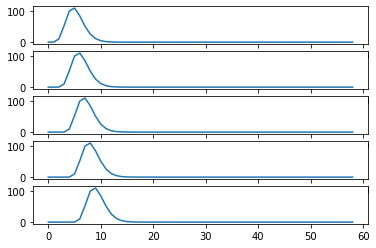

In [17]:
fig, axes = plt.subplots(5, 1)
for row_no in range(5):
    axes[row_no].plot(shifted_hrfs[row_no, :])